In [4]:
from pathlib import Path

from jmppeft.tasks.finetune import dataset_config as DC

# from jmppeft.datasets.matbench_discovery_megnet_npz import

base_path = Path("/mnt/datasets/matbench-discovery-traj/megnet-133k-npz/")
config = DC.matbench_discovery_config(
    base_path,
    "train",
    use_megnet_133k=True,
    use_atoms_metadata=True,
    use_linref=True,
)
config

FinetuneMatbenchDiscoveryMegNet133kDatasetConfig(base_path=Path('/mnt/datasets/matbench-discovery-traj/megnet-133k-npz/train'), energy_linref_path=Path('/mnt/datasets/matbench-discovery-traj/megnet-133k-npz/linrefs.npy'))

In [5]:
dataset = config.create_dataset()

In [8]:
from tqdm.auto import trange

energies = []
for i in trange(len(dataset)):
    try:
        data = dataset[i]
        energies.append(data.y.item())
    except:
        continue

len(energies)

  0%|          | 0/168918 [00:00<?, ?it/s]

168918

(-500.0, 500.0)

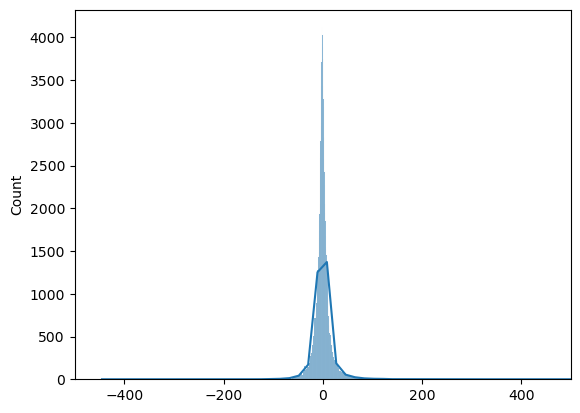

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

energies_np = np.array(energies)
sns.histplot(energies_np, kde=True)
plt.xlim(-500, 500)